### 3.1 ML Clustering - K-means

Avant d'aider John et Doug, entraîne-toi en effectuant un clustering utilisant le dataset Iris. Pour ce faire :

Dans scikit-learn, importe le dataset Iris, c'est un grand classique de la data. Il contient 3 espèces de fleurs (des iris) suivant leur longueur et largeur de pétale et de sépale.
Entraîne ton modèle pour qu’il trouve 3 clusters à partir des 4 colonnes numériques.
Produis une visualisation comparant le dataset de base avec les classes générées par le K-means en t’inspirant de cette image. Tu peux prendre 2 dimensions de ton choix parmi les 4.
Sur le graphique de gauche, tu dois afficher les points avec des couleurs différentes pour chaque cluster d'appartenance, ainsi que le centre de chaque cluster bien en évidence (ici les croix vertes).
Sur le graphique de droite, tu dois afficher les points avec des couleurs différentes correspondant à leur espèce d'iris species

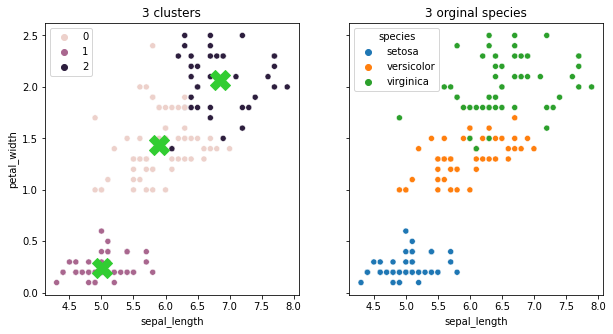

In [22]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go

In [42]:
df = sns.load_dataset('iris')
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
#  autre solution on prend toutes les colonnes sauf la derniére qui est catégorielle 'species'
# X = df.iloc[:, :-1].values
# on ne prend que les colonnes numeriques
X = df.select_dtypes(include=[np.number])
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
# Résumé des informations du dataframe
your_dataframe = X
print(f"\nshape: {your_dataframe.shape} \nlist columns :\n{
      your_dataframe.columns.tolist()} ")
print(f"liste des colonnes numeriques: \n{
      your_dataframe.select_dtypes(include=[np.number]).columns.tolist()}\n")
print(f"liste des colonnes non numeriques: \n{
      your_dataframe.select_dtypes(exclude=[np.number]).columns.tolist()} ")
print(f"Colonne avec des na :{your_dataframe.isna().sum()} \n")
print(f"\ndf head :\n{your_dataframe.head(2)} \n")
print(f"\ndf describe :\n{your_dataframe.describe()} \n")


shape: (150, 4) 
list columns :
['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] 
liste des colonnes numeriques: 
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

liste des colonnes non numeriques: 
[] 
Colonne avec des na :sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64 


df head :
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2 


df describe :
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100

In [28]:
model = KMeans(n_clusters=3, random_state=0)
model.fit(X)

c:\Users\romar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=0)

In [47]:
model.predict(X)
# Effectuer la classification KMeans
model = KMeans(n_clusters=5, random_state=0)
model.fit(X)

# Afficher les résultats
fig = px.scatter(df, x='sepal_length', y='sepal_width', color=model.labels_)
fig.add_trace(px.scatter(x=model.cluster_centers_[:, 0], y=model.cluster_centers_[
              :, 1],  mode='markers', marker=dict(size=10, color='red')))
fig.show()

c:\Users\romar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



TypeError: scatter() got an unexpected keyword argument 'mode'

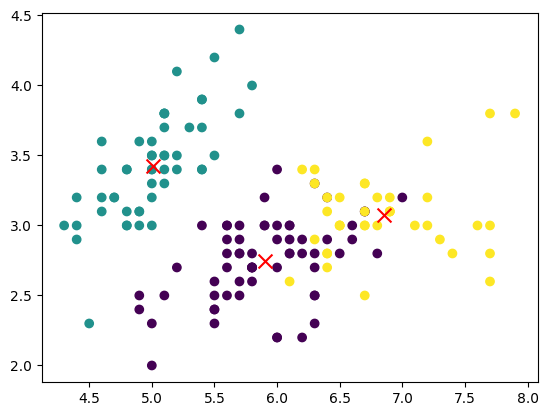

In [43]:
# Prédire les étiquettes de cluster pour les données
labels = model.predict(X)

# Afficher les résultats
fig = plt.scatter(df['sepal_length'], df['sepal_width'], c=labels)
fig = plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[
                  :, 1], s=100, c='red', marker='x')
plt.show()

In [45]:
# distance entre les points
model.inertia_
# idem inertie mais valeur négative
model.score(X)

-78.851441426146

Text(0, 0.5, 'cout du modele')

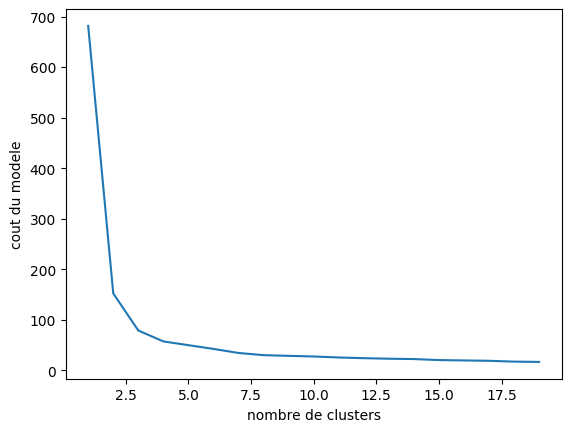

In [49]:
# determine le nombre de clusters
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('cout du modele')

# Sur le graphique on voit que le point d'infelxion est vers 3 clusters